<a href="https://colab.research.google.com/github/rajeev-sr/Deep-Learning/blob/main/perceptron/placemnets_data_perceptron_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/placement-dataset.csv")
df.shape

(100, 4)

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.dropna(inplace=True)


In [ ]:
df.shape

(100, 3)

###perceptron model from sklearn

In [ ]:
sns.scatterplot(x='cgpa',y='iq',hue='placement',data=df)

<Axes: xlabel='Epoch = 49', ylabel='iq'>

In [ ]:
X=df.iloc[:,0:2]
Y=df.iloc[:,-1]

In [ ]:
from sklearn.linear_model import Perceptron
p=Perceptron()

In [ ]:
p.fit(X,Y)

Perceptron()

In [ ]:
p.coef_

array([[1218.5, -193. ]])

In [ ]:
p.intercept_

array([-7.])

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values,Y.values,clf=p,legend=2)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: xlabel='Epoch = 49', ylabel='iq'>

### algorithm for perceptron

In [16]:
from sklearn.datasets import make_classification
import numpy as np

X, Y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=1,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=41,
    hypercube=False,
    class_sep=10
)


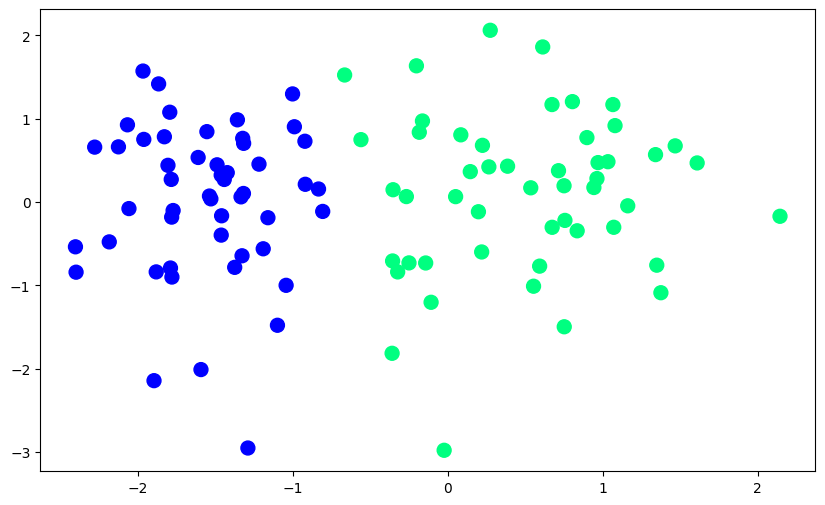

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=Y, cmap='winter', s=100)

In [18]:
def step(z):
  return 1 if z>0 else 0

In [19]:
# def perceptron(X,Y):
#   X=np.insert(X,0,1,axis=1)
#   weights=np.ones(X.shape[1])
#   print(X[1])
#   print(X.shape[1])
#   lr=0.1
#   epoch=1

#   for i in range(epoch):
#     p=np.random.randint(0,100)
#     y_hat=step(np.dot(X[1],weights))
#     print(y_hat)
#     weights=weights-X[1]
#     print(weights)
#     intercept=weights[0]
#     coef=weights[1:]
#     print(intercept)
#     print(coef)
#     m=-(coef[0]/coef[1])
#     b=-(intercept/coef[1])
#     x_input=np.linspace(-50,50,100)
#     y_input=m*x_input+b
#     plt.figure(figsize=(10,6))
#     plt.plot(x_input, y_input, color='red', linewidth=3)
#     # plt.scatter(X[:,1], X[:,2], c=Y, cmap='winter', s=100)
#     plt.ylim(-10,200)


#   return weights[0],weights[1:]

# intercept,coef=perceptron(X,Y)

In [26]:
def perceptron(X,Y):
  X=np.insert(X,0,1,axis=1)
  weights=np.ones(X.shape[1])
  lr=0.1
  epoch=200

  for i in range(epoch):
    p=np.random.randint(0,100)
    y_hat=step(np.dot(X[p],weights))
    # print(y_hat)
    weights=weights+lr*(Y[p]-y_hat)*X[p]


  return weights[0],weights[1:]

intercept,coef=perceptron(X,Y)

In [27]:
print(intercept)
print(coef)

0.9
[1.4079031  0.14058923]


In [28]:
m=-(coef[0]/coef[1])
b=-(intercept/coef[1])

In [29]:
x_input=np.linspace(-3,3,100)
y_input=m*x_input+b

(-3.0, 2.0)

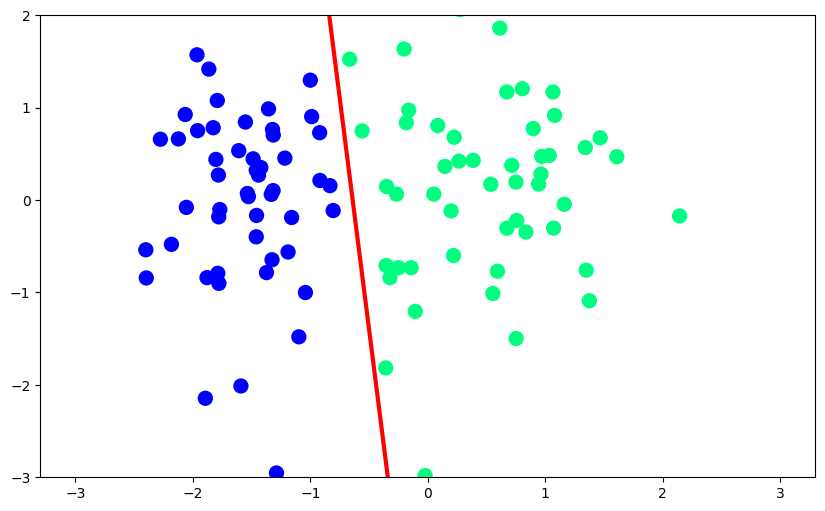

In [31]:
plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap='winter', s=100)
plt.ylim(-3,2)

In [32]:
def perceptron(X,Y):

  m=[]
  b=[]

  X=np.insert(X,0,1,axis=1)
  weights=np.ones(X.shape[1])
  lr=0.1
  # epoch=100

  for i in range(50):
    p=np.random.randint(0,99)
    y_hat=step(np.dot(X[p],weights))
    # print(y_hat)
    weights=weights+lr*(Y[p]-y_hat)*X[p]

    m.append(-(weights[1]/weights[2]))
    b.append(-(weights[0]/weights[2]))


  return m,b



In [33]:
m,b=perceptron(X,Y)

In [34]:
%matplotlib notebook
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import Image

In [69]:
fig,ax=plt.subplots(figsize=(9,5))

x_i=np.arange(-3,3,0.1)
y_i=x_i*m[0]+b[0]

ax.scatter(X[:,0],X[:,1],c=Y,cmap='winter',s=100)
line, =ax.plot(x_i,x_i*m[0]+b[0],'r-',linewidth=2)
plt.ylim(-3,3)
def update(i):
    line.set_ydata(x_i * m[i] + b[i])
    ax.set_xlabel(f'Epoch = {i}')
    # return line,

# Create animation
anim = FuncAnimation(fig, update,repeat=True, frames=len(m) ,interval=100)

<IPython.core.display.Javascript object>

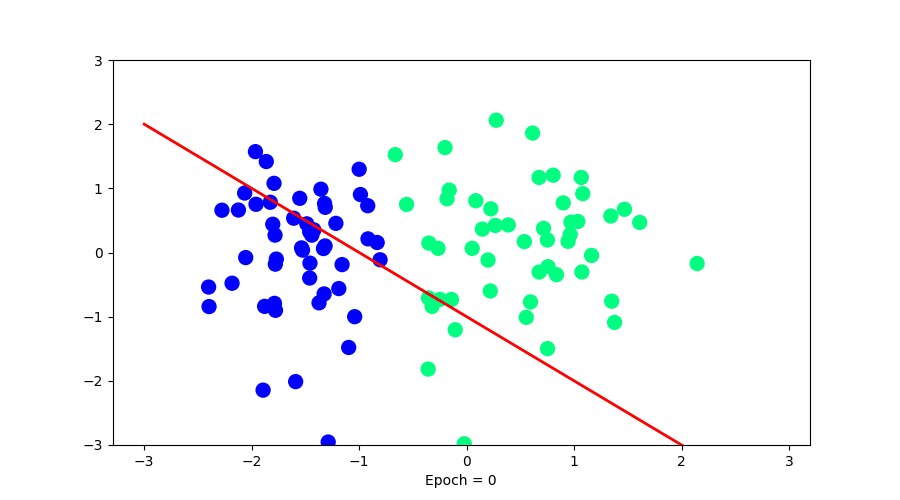

In [71]:
anim.save('perceptron.gif', writer=PillowWriter(fps=10))

# Display the GIF
Image(filename="perceptron.gif")
